# CycleGAN
##### Князев Марк

### Loading

In [ ]:
# Скачиваем датасеты и веса к двум задачам:
#   Apple2Orange (данный датасет взят с Kaggle)
#   Autumn2Summer(данный датасет составлен с помощью Яндекс Картинок по запросам "Осенний Лес" и "Летний лес")
!gdown --id 1F7ykX011Ofr24jhR7SePIpe6bWh0EYiy

Downloading...
From: https://drive.google.com/uc?id=1F7ykX011Ofr24jhR7SePIpe6bWh0EYiy
To: /content/Weights_and_Data.zip
436MB [00:02, 172MB/s]


In [ ]:
!unzip -q Weights_and_Data.zip

In [ ]:
# Распаковываем архив с датасетом
!mkdir Dataset1
!unzip -q Apple2Orange_Files/apple2orange.zip -d 'Dataset1'

!mkdir Dataset2
!unzip -q Autumn2Summer_Files/Summer2Autumn.zip -d 'Dataset2'

# Создаём папки в которые можно будет загруить свои изображения для теста
!mkdir hand_test

!gdown --id 1-3v4iAtn9aaqtdmEboUL034LV2EOIChc
!unzip -q hand_test.zip -d 'hand_test'

Downloading...
From: https://drive.google.com/uc?id=1-3v4iAtn9aaqtdmEboUL034LV2EOIChc
To: /content/hand_test.zip
100% 1.42M/1.42M [00:00<00:00, 22.3MB/s]


### Import

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import copy
import pickle

from Modules.General_GAN import GAN, GAN_Opt, GAN_Loader
from Modules.GAN_training_with_service import train, plot_2, plot_4, plot_6

from Modules.Discr import Discriminator
from Modules.Gen import Generator
from Modules.ImDataset_v2 import ImageDataset

if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'
print(f'Device is {device}')

Device is cuda


### Models Initialization

In [ ]:
my_GAN = GAN(Generator, Discriminator, device)
my_GAN.weight_init(mean=0.0, std=0.02)

criterion_L1 = nn.L1Loss()
criterion_MSE = nn.MSELoss()

lr = 0.0002 * 0.5
my_Opt = GAN_Opt(gan=my_GAN, optimizer=optim.Adam, lr=lr)

In [ ]:
## История лосов
class Info():
  def __init__(self):
    self.loss_G = []
    self.loss_F = []
    self.loss_D_A = []
    self.loss_D_B = []
    self.acc_D_A_real = []
    self.acc_D_A_fake = []
    self.acc_D_B_real = []
    self.acc_D_B_fake = []

my_info = Info()

## Apple2Orange

### Train Loop

In [ ]:
my_Loader = GAN_Loader('Dataset1', (256, 256), 1, ImageDataset)

Первый класс: 995
Второй класс: 1019


In [ ]:
# Подгрузим веса
my_GAN.load_weights('Apple2Orange_Files/Weights', 'CycleGAN_2SkipConZ_Norm', 70000)

In [ ]:
# train(10,
#       my_GAN,
#       my_Opt,
#       my_Loader,
#       device,
#       criterion_MSE,
#       criterion_L1,
#       '2SCZ_Forest',
#       'Apple2Orange_Files/Weights',
#       my_info,
#       small_period=25,
#       medium_period=50,
#       D_mult=0.75,
#       save=True,
#       k_L1=10,
#       k_L2=0,
#       save_period=7000)

### Тест на своих изображениях
Чтобы протестировать модель на своих изображениях, поместите их в соответствующие папки в hand_test


In [ ]:
def test_on_image(model, test_folder):
  test_dataset = ImageDataset(test_folder, (256, 256))
  test_loader = DataLoader(test_dataset, batch_size=1)
  with torch.no_grad():
    for i, data in enumerate(test_loader):
      sample = data.to(device)
      result = model(sample.permute(0, 3, 1, 2))
      plot_2(data[0, :, :, :].cpu(), result.permute(0, 2, 3, 1)[0, :, :, :].cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


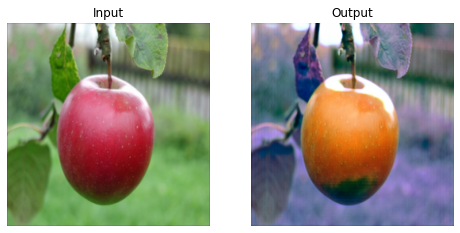

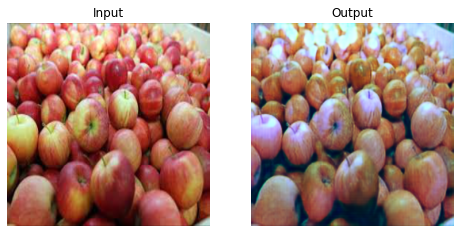

In [ ]:
### Тест на своих изображениях
test_on_image(my_GAN.G, 'hand_test/Apples')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


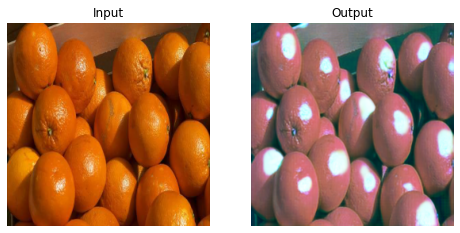

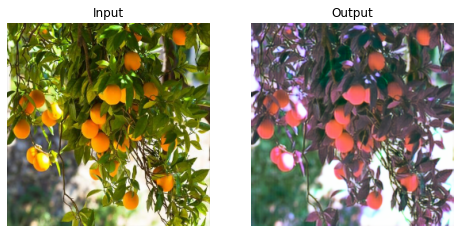

In [ ]:
test_on_image(my_GAN.F, 'hand_test/Oranges')

## Autumn2Summer

### Train Loop

In [ ]:
my_Loader = GAN_Loader('Dataset2', (256, 256), 1, ImageDataset)

Первый класс: 466
Второй класс: 481


In [ ]:
## История лосов
class Info():
  def __init__(self):
    self.loss_G = []
    self.loss_F = []
    self.loss_D_A = []
    self.loss_D_B = []
    self.acc_D_A_real = []
    self.acc_D_A_fake = []
    self.acc_D_B_real = []
    self.acc_D_B_fake = []

my_info = Info()

In [ ]:
# Подгрузим веса
my_GAN.load_weights('Autumn2Summer_Files/Weights', '2SCZ_Forest', 110000)

In [ ]:
# train(10,
#       my_GAN,
#       my_Opt,
#       my_Loader,
#       device,
#       criterion_MSE,
#       criterion_L1,
#       '2SCZ_Forest',
#       'Autumn2Summer_Files/Weights',
#       my_info,
#       small_period=25,
#       medium_period=50,
#       D_mult=0.75,
#       save=True,
#       k_L1=10,
#       k_L2=0,
#       save_period=7000)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


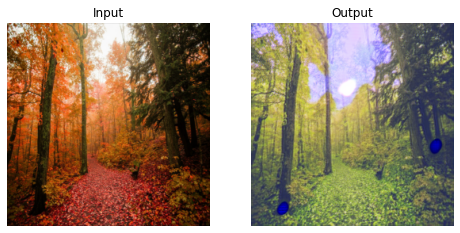

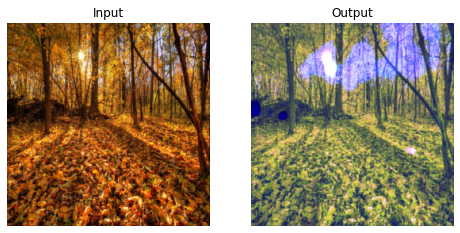

In [ ]:
### Тест на своих изображениях
test_on_image(my_GAN.G, 'hand_test/AutumnForest')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


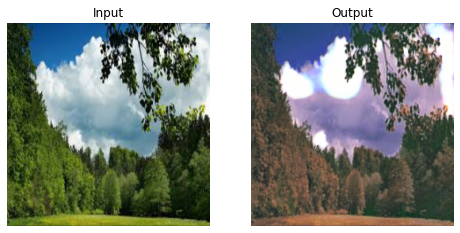

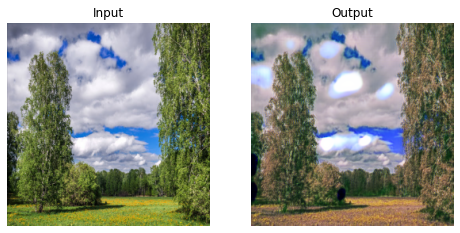

In [ ]:
test_on_image(my_GAN.F, 'hand_test/SummerForest')